In [91]:
library(Hmisc)
library(CausalImpact)
library(zoo)
library(matrixStats)
library(forecast)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



## Задание 1

### Что  этот  пакет  делает?
Этот пакет может посчитать измерении под влиянием конкретного события, такого как выпуск нового продукта. Каузальное воздействие события представляет собой разницу между наблюдаемой величиной ответа и (не наблюдаемой) величиной, которая была бы  получена  при  отсутствии  воздействия 
### Какие  есть  проблемы  при  простом  решения  этой з адачи?
Чтобы посчитать влияние события, которое в течение какого-то времени повлияло на измеряемую величину. Можно было бы просто сравнить показатели перед событием и после события, или сравнить показатели двух групп, например A/B тестирование. Но на самом деле трудно измерить такое воздействие в реальном мире, потому что есть много  атрибутов, к оторые  могут  влиять  на  результат.
### Как  примерно  работает?
CausalImpact делается предположение, что существует три компоненты – априорное знание о параметрах модели, контрольные значения до изменения и значения таргета до изменения. CausalImpact строит байесовскую структурную модель временных рядов на основе нескольких сопоставимых контрольных групп, и поведение самого временного ряда до вмешательства, и использует модель для прогнозирования ряда базовых з начений з а  период  времени  после  события.
Он улучшает существующие методы в двух отношениях: он обеспечивает полностью байесовскую оценку временного ряда, и он использует усреднение модели для построения наиболее подходящего синтетического управления для моделирования контрафакта.
### Как  именно  работает?
Структурные модели временных рядов полезны на практике, потому что они гибкие и модульные. Очень большой класс моделей, включая все модели ARIMA, можно записать  в  форме  состояния, з аданной  формулами:
$y_t = Z_t^T \alpha_t + \epsilon_t$  - -  уравнение  наблюдения; 
$\alpha_{t+1} = T_t \alpha_t + R_t \eta_t$ - -  уравнение  состояния где: 
1. $ε_t$ и $η_t$ -- стандартный шум с дисперсией σt и Qt соответственно, 
2. yt -- скалярное наблюдение,  
3. $Z_t$  - -  выходной  вектор,  
4. $T_t$  -   матрица  перехода,  
5. $R_t$  -   матрица  управления. 

Общий подход заключается в том, чтобы предположить, что ошибки различных моделей состояний-компонентов независимы (т. Е. Qt является блочно-диагональным). Тогда вектор αt может быть образован путем конкатенации отдельных компонент состояния,   T t   и  Rt становятся  блочно-диагональными  матрицами. Также  в  модель  можно  включать  модели:
1. Локальная  линейная т ренд.
2. Сезонность.
3. Современные к овариаты  со  статическими к оэффициентами.
Естественным способом включения контрольных серий в модель является линейная регрессия. Его коэффициенты могут быть статическими или изменяющимися во времени. Используются когда соотношение между элементами управления и обработанной единицей до события было стабильным.
4. Современные ковариации с динамическими коэффициентами. Альтернативой вышесказанному является компонент регрессии с коэффициентами динамической  регрессии  для  учета  изменяющихся  во  времени  соотношений.

## Задание 2

Сезонность:  использовать стоит в тех случаях, когда в ряде-предикторе есть сезонная компонента. 
Однако, если в таргет-ряде есть сезонная компонента, и логично было бы, поставить сезонность, но если в  ряде-предикторе -- нет, то использование только ухудшает результат.

Динамические коэффициенты полезны, когда считается, что линейная зависимость между рядом-предиктором и элементами таргет-ряда изменяется со временем. 
Лучше не использовать когда соотношение между элементами таргет-ряда и рядом-предиктором до события было стабильным.


In [2]:
set.seed(179)

#### Сезонность

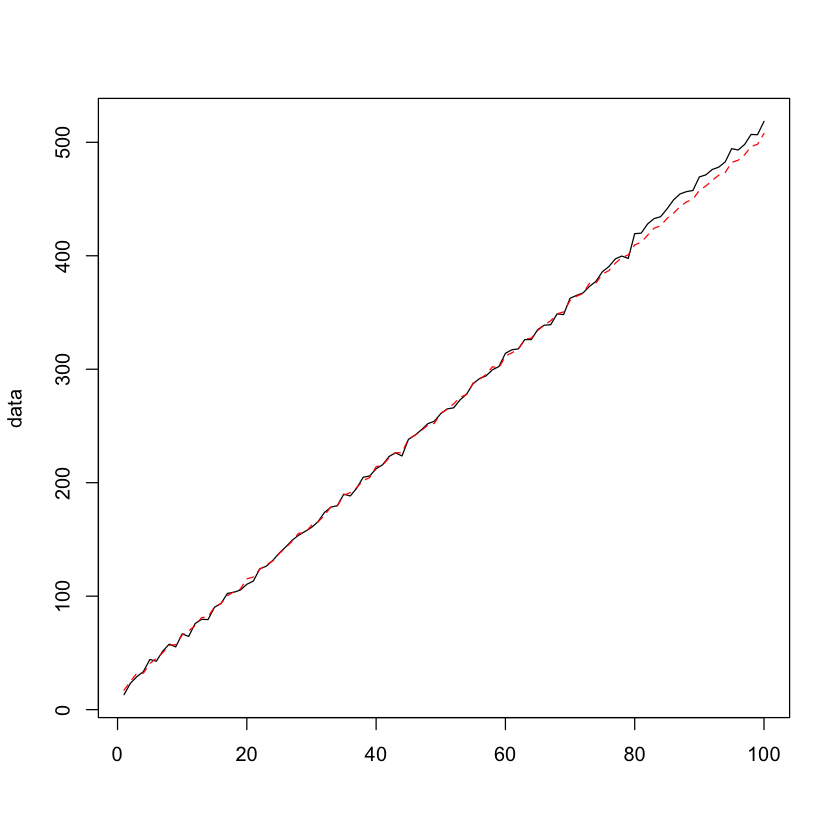

In [140]:
seasons <- rnorm(n = 5, sd = 1)
trend <- seq(from = 20, to = 505, length.out = 100) 
x1 <- trend + seasons + rnorm(100)
x1 <- x1
y <- x1 + rnorm(100, sd = 2)
y[80:100] <- y[80:100] + 10
data <- cbind(y, x1)
pre.period <- c(1, 80)
post.period <- c(81, 100)
matplot(data, type = "l")

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average         Cumulative   
Actual                   468             9369         
Prediction (s.d.)        460 (12)        9206 (248)   
95% CI                   [436, 484]      [8715, 9684] 
                                                      
Absolute effect (s.d.)   8.2 (12)        163.7 (248)  
95% CI                   [-16, 33]       [-315, 654]  
                                                      
Relative effect (s.d.)   1.8% (2.7%)     1.8% (2.7%)  
95% CI                   [-3.4%, 7.1%]   [-3.4%, 7.1%]

Posterior tail-area probability p:   0.25301
Posterior prob. of a causal effect:  75%

For more details, type: summary(impact, "report")



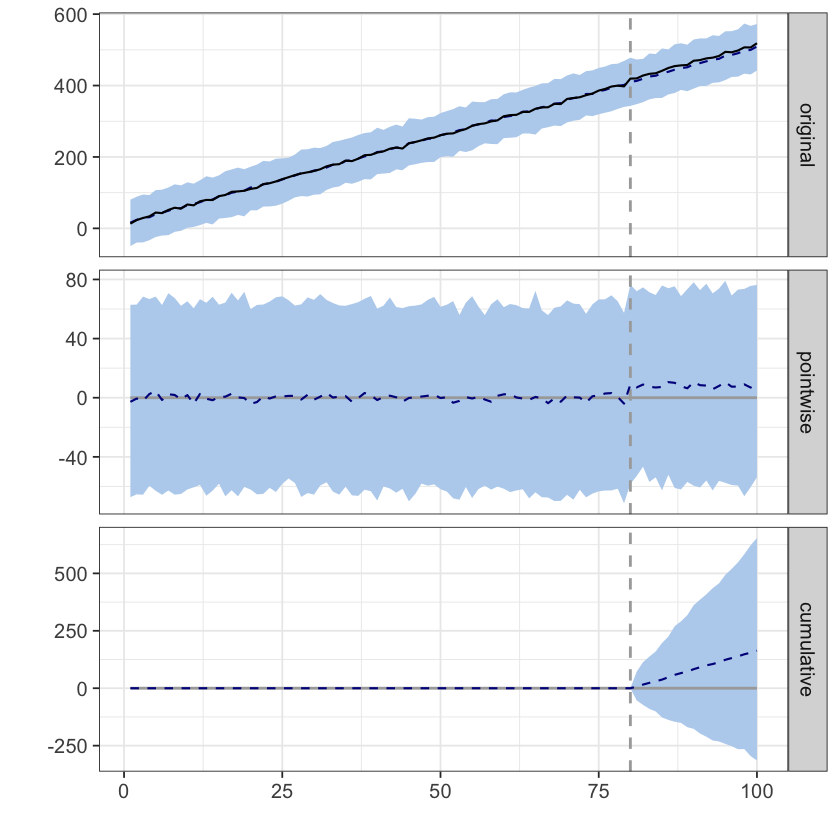

In [141]:
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)
summary(impact)

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average         Cumulative   
Actual                   468             9369         
Prediction (s.d.)        460 (14)        9192 (271)   
95% CI                   [434, 488]      [8684, 9761] 
                                                      
Absolute effect (s.d.)   8.9 (14)        177.9 (271)  
95% CI                   [-20, 34]       [-391, 686]  
                                                      
Relative effect (s.d.)   1.9% (3%)       1.9% (3%)    
95% CI                   [-4.3%, 7.5%]   [-4.3%, 7.5%]

Posterior tail-area probability p:   0.2668
Posterior prob. of a causal effect:  73%

For more details, type: summary(impact, "report")



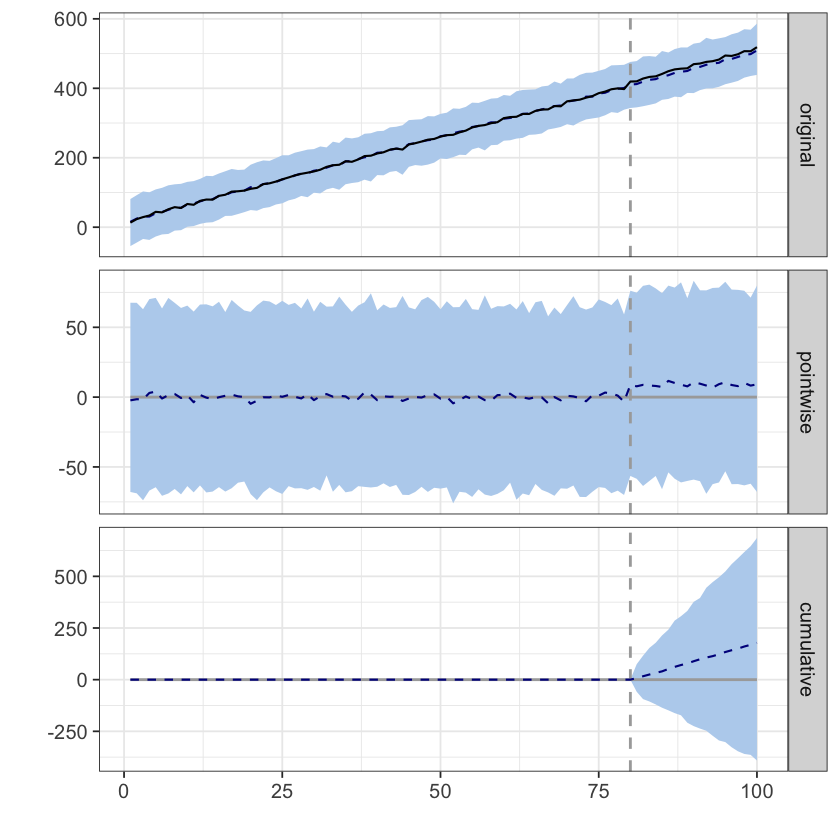

In [142]:
impact <- CausalImpact(data, pre.period, post.period, model.args = list(nseasons = 5))
plot(impact)
summary(impact)

Итак, мы видим, что если рассказываем модели, о известной нам сезонности, то ее показатели падают.

#### Динамические коэффициенты

Рассмотрим случай, когда коэффиценты были все время не постоянны

Warning message in y[1:50] <- x[11:50] + rnorm(10, sd = 2):
“число единиц для замены не является произведением длины замены”Warning message in y[81:100] <- 0.8 * x[71:100] + rnorm(5, sd = 2):
“число единиц для замены не является произведением длины замены”

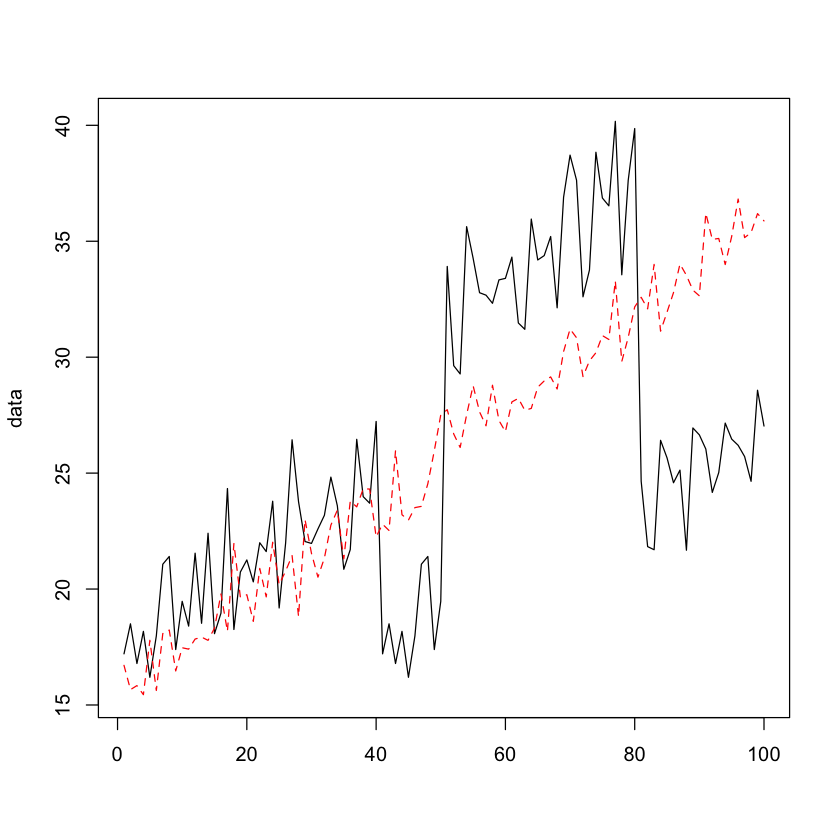

In [157]:
trend <- seq(from = 10, to = 20, length.out = 100) ** 1.2
x <- trend + rnorm(100)
y <- x
y[1:50] <- x[11:50] + rnorm(10, sd = 2)
y[51:100] <- 1.2*x[51:100] + rnorm(10, sd = 2)
y[81:100] <- 0.8 * x[71:100] + rnorm(5, sd = 2)
data <- cbind(y, x)
matplot(data, type = "l")

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,25.31233,39.57092,37.10031,42.07616,1.291242,-14.25859,-16.76383,-11.78798,1.291242,-0.3603299,-0.4236401,-0.2978951,0.03263109,0.05,0.001008065
Cumulative,506.24662,791.41834,742.00630,841.52313,25.824842,-285.17172,-335.27651,-235.75967,25.824842,-0.3603299,-0.4236401,-0.2978951,0.03263109,0.05,0.001008065


Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

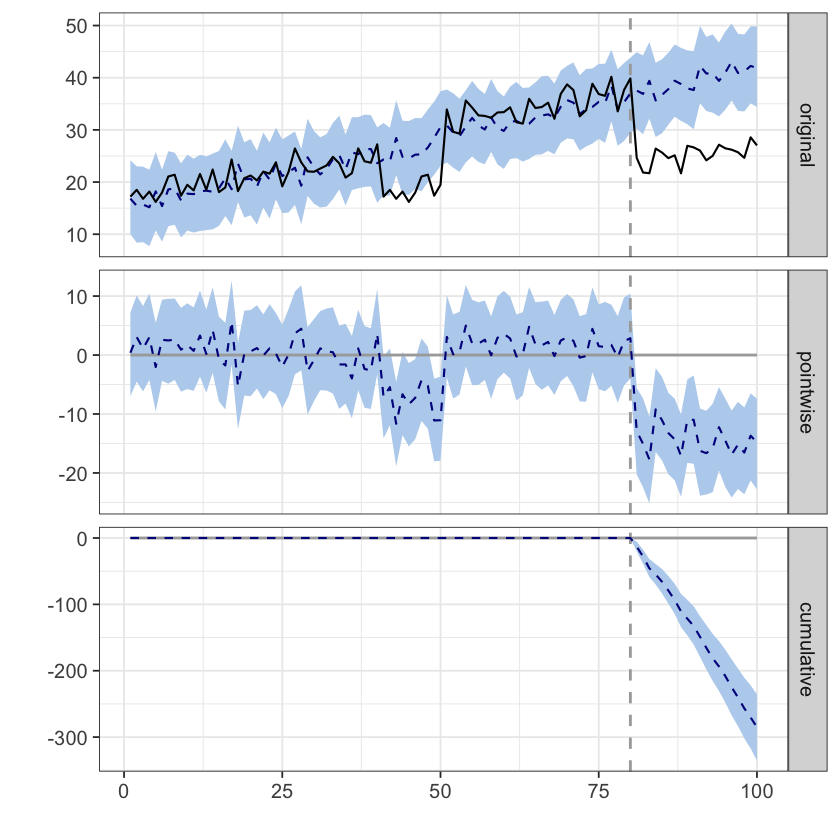

In [158]:
impact <- CausalImpact(data, pre.period, post.period, model.args = list())
impact$summary
plot(impact)

Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

Posterior inference {CausalImpact}

                         Average         Cumulative   
Actual                   25              506          
Prediction (s.d.)        52 (152)        1042 (3049)  
95% CI                   [-243, 344]     [-4867, 6877]
                                                      
Absolute effect (s.d.)   -27 (152)       -536 (3049)  
95% CI                   [-319, 269]     [-6371, 5373]
                                                      
Relative effect (s.d.)   -51% (293%)     -51% (293%)  
95% CI                   [-612%, 516%]   [-612%, 516%]

Posterior tail-area probability p:   0.44
Posterior prob. of a causal effect:  56%

For more details, type: summary(impact, "report")



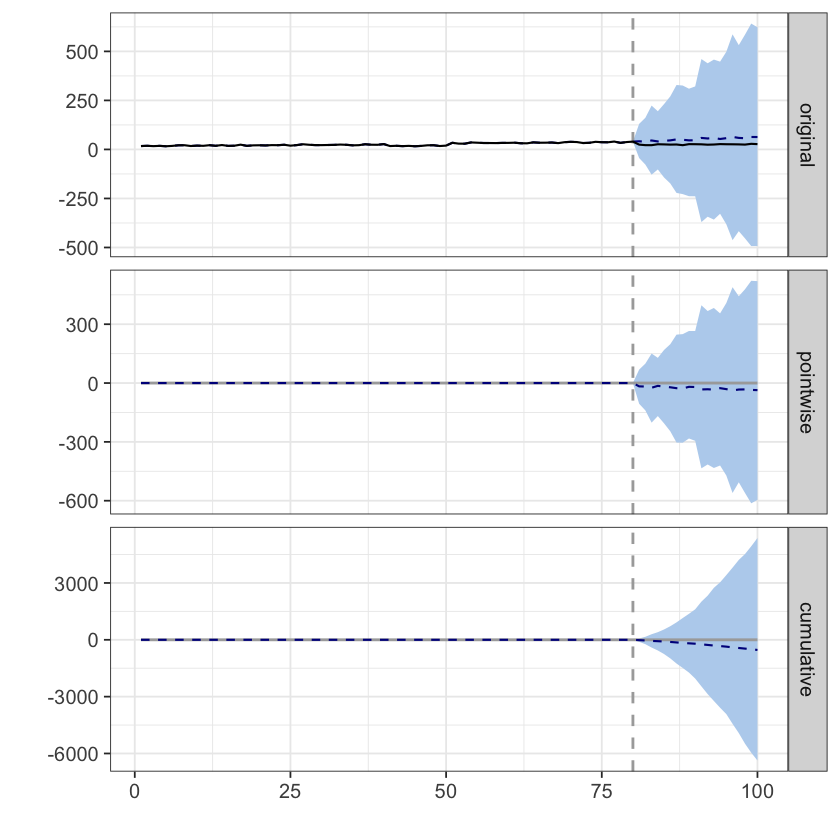

In [159]:
impact <- CausalImpact(data, pre.period, post.period, model.args = list(dynamic.regression = TRUE))
plot(impact)
summary(impact)

Как можно заметить, в случае, если мы говорим, что коэффиценты были динамичными -- модель начинает намного хуже предсказывать.

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,25.31233,42.20584,39.61916,44.71156,1.340293,-16.89351,-19.39923,-14.30683,1.340293,-0.4002647,-0.4596337,-0.3389775,0.0317561,0.05,0.001083424
Cumulative,506.24662,844.11681,792.38319,894.23116,26.805860,-337.87018,-387.98453,-286.13657,26.805860,-0.4002647,-0.4596337,-0.3389775,0.0317561,0.05,0.001083424


Warning message:
“Removed 100 rows containing missing values (geom_path).”Warning message:
“Removed 49 rows containing missing values (geom_path).”Warning message:
“Removed 200 rows containing missing values (geom_path).”

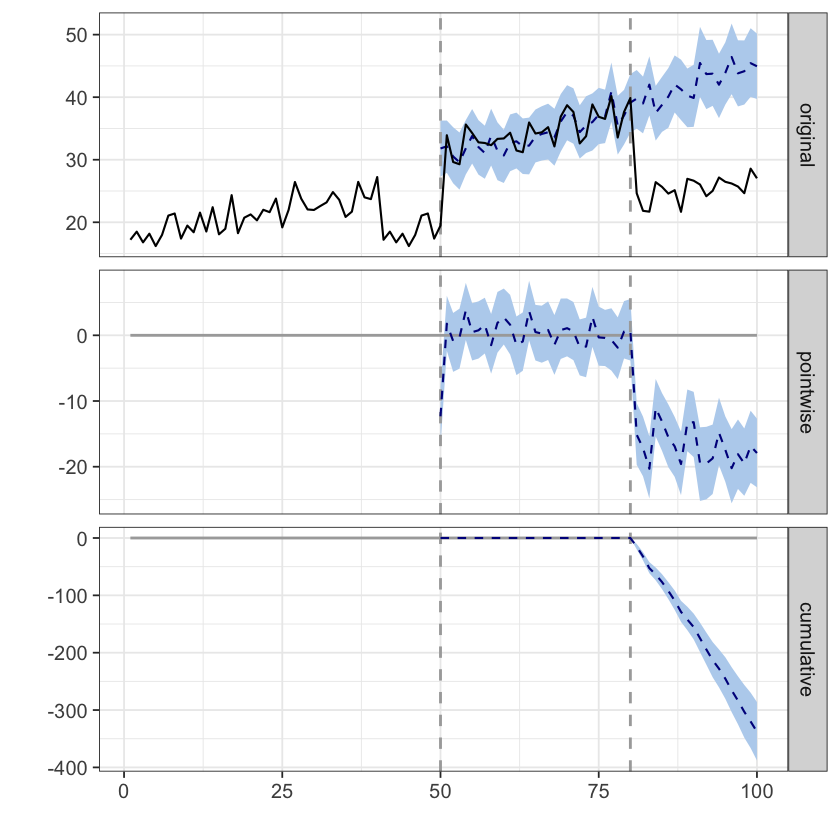

In [160]:
pre.period <- c(50, 80)
post.period <- c(81, 100)
impact <- CausalImpact(data, pre.period, post.period, model.args = list())
impact$summary
plot(impact)

Так что если мы знаем, что коэффиценты динамические, то лучше не говорить об этом, а сразу задать с того места, где они константные

## Задание 3

Для начала рассмотрим случаи, когда человек мог заметить улучшение картинок и при этом начать чаще искать в яндексе/ или делать что-то что мы сможем зарегистрировать:
* Челоек использует яндекс, но только как поисковк. Заметил, что картинки стали лучше, и начил пользоваться еще и ими.
* Человек пользуется разными поисковиками, заметил, что яндекс выдает более релевантные картинки, и начал пользоваться ими.
* Пользователь часто ищет в яндексе, и теперь снипеты картинок в основном поиске стали лучше, он начал находить ответы быстрее.

Также есть требования к ряду-предиктору следующие: необходимо, чтобы по предиктору мы могли хорошо предсказывать таргет до события, а также влияние события на предиктор должно быть минимально. 

Итого можем рассматривать разные ряды-таргеты -- активности пользователей, соответственно  с  ними  меняются  и  ряды-предикторы:
1. Во-первых можно считать количество запросов за день от пользователей, соответственно в качестве ряда-предиктора в таком случае можно рассматривать количество запросов у конкурентов: потому что снижение/повышение запросов вызванное выходными/праздниками будет примерно одинаково. Однако, если наше улучшение будет работать очень хорошо -- то количество запросов у конкурентов может уменьшится, поэтому стоит рассматривать количество запросов у конкурентов как на русско язычном сегменте, т ак  и  на  англоязычном.
2. Во-вторых, в качестве таргет-ряда, можно посмотреть, количество кликов в сутки, опять же в качестве ряда-предиктора можно рассматривать тот же показатель у конкурентов. Однако, стоит следить за несколькими конкурентами, потому что какой-нибудь конкретный конкурент мог тоже обновить поиск картинок.
3. В-третьих можно считать время поиска: от введения текста запроса, до перехода по какой-нибудь ссылке и закрытия поисковика. Аналогично можно использовать в качестве ряда-предиктора конкурентов. Однако, эта самая спорная метрика: потому что если человек не смог найти совсем ничего полезного -- то он тоже закроет поисковик. Таким образом график, полученный по  этой  метрике  будет  сложнее  всего  анализировать.
4. Также можно рассматривать количество новых пользователей. В качестве ряда-предиктора можно использовать эмпирические знания о притоке новых пользователей или же те же показатели у конкурентов (снова у конкурентов могут быть тоже вводиться новые фичи, которые увеличат приток пользователей к   ним,  поэтому  лучше  смотреть  на  нескольких).

## Задание 4

Считаем данные. 

In [68]:
data1 <- read.csv("CausalImpact_homework_data1.csv")
data2 <- read.csv("CausalImpact_homework_data2.csv")

In [69]:
head(data1)

date,target,market_1,market_2,market_3,market_4,market_5,should_be_impacted_1,should_be_impacted_2,should_be_impacted_3,⋯,may_be_not_impacted_3,may_be_not_impacted_4,may_be_not_impacted_5,may_be_not_impacted_6,may_be_not_impacted_7,may_be_not_impacted_8,may_be_not_impacted_9,may_be_not_impacted_10,may_be_not_impacted_11,may_be_not_impacted_12
2013-12-18,21110.60,5855898,10490066,6400020,17303909,8277376,202418.0,501304.0,281527.7,⋯,2.46,20.30,11.76,13.53,27.36,23.53,41.25,NA,23.73,9.24
2013-12-19,19985.20,5233946,8856544,5772768,13711773,7417712,195205.4,456269.5,222715.5,⋯,2.05,13.05,12.25,14.76,28.50,28.96,37.95,11.94,31.64,6.93
2013-12-20,19602.36,4923801,8346250,5429014,12574661,6999351,205468.9,496172.0,283458.8,⋯,1.23,23.20,10.78,9.84,45.03,27.15,34.65,7.96,28.25,3.85
2013-12-21,21955.16,6061035,10408902,6624329,17318726,8561364,210051.0,516636.4,272849.0,⋯,3.28,24.65,10.78,11.07,44.46,25.34,36.30,5.97,38.42,8.47
2013-12-22,22388.32,6139137,10323537,6646342,16883212,8662216,217223.1,530008.4,269956.1,⋯,1.23,31.90,12.74,11.07,53.01,23.53,49.50,3.98,39.55,5.39
2013-12-23,23793.20,6368549,10494566,6864796,17262817,8962794,209871.1,536184.1,308934.5,⋯,1.64,26.10,6.86,8.61,51.87,18.10,46.20,3.98,35.03,12.32


In [70]:
head(data2)

num,start_date,end_date,estimation_size_of_marketing_activity,is_related_to_our_service
1,26,56,4.6,1
2,31,60,0.1,0
3,52,66,0.5,1
4,111,144,5.7,1
5,174,197,2.6,0
6,200,212,10.0,0


Распарсим на даты и числа

In [71]:
options(warn=-1)

data1[,c(2:ncol(data1))] <- lapply(data1[,c(2:ncol(data1))], function(x) as.numeric(as.character(x)))
data1 <- na.locf(data1)
data1[,c(2:ncol(data1))] <- lapply(data1[,c(2:ncol(data1))], as.numeric)
                                   
data2[,c(3:ncol(data2))] <- lapply(data2[,c(3:ncol(data2))], function(x) as.numeric(as.character(x)))
data2 <- na.locf(data2)
data2[,c(3:ncol(data2))] <- lapply(data2[,c(3:ncol(data2))], as.numeric)

options(warn=0)

In [72]:
c(anyNA(data1), anyNA(data2))

[1]  TRUE FALSE

Отмаштабируем data1 для сравнения рядов, можно так как Causal Impact устойчив относительно линейных преобразований

In [79]:
sum(complete.cases(data1)) / nrow(data1)
data1 <- data1[complete.cases(data1), ]

date3 <- data1[2:ncol(data1)]
col_mins <- colMins(as.matrix(date3))
data1[2:ncol(data1)] <- date3 - matrix(col_mins, nrow = nrow(data1), ncol = ncol(data1) - 1, byrow = TRUE)

date4 <- data1[2:ncol(data1)]
col_maxs <- colMaxs(as.matrix(date4))
data1[2:ncol(data1)] <- date4 / matrix(col_maxs, nrow = nrow(data1), ncol = ncol(data1) - 1, byrow = TRUE)

[1] 1

In [82]:
head(data1)

,date,target,market_1,market_2,market_3,market_4,market_5,should_be_impacted_1,should_be_impacted_2,should_be_impacted_3,⋯,may_be_not_impacted_3,may_be_not_impacted_4,may_be_not_impacted_5,may_be_not_impacted_6,may_be_not_impacted_7,may_be_not_impacted_8,may_be_not_impacted_9,may_be_not_impacted_10,may_be_not_impacted_11,may_be_not_impacted_12
2,2013-12-19,0.000535583,0.01097091,0.2336067,0.2702102,0.02329005,0.01063052,0.02438196,0.01316308,0.1788373,⋯,0.004077472,0.004230118,0.006205095,0.05164319,0.01270310,0.02976190,0.004236091,0.018315018,0.007474813,0.015625000
3,2013-12-20,0.000000000,0.00000000,0.2201468,0.2541198,0.00000000,0.00000000,0.03227858,0.02966163,0.2700236,⋯,0.002038736,0.010152284,0.005225343,0.03286385,0.02127031,0.02777778,0.003671279,0.010989011,0.006499838,0.008680556
4,2013-12-21,0.003291505,0.04022795,0.2745529,0.3100699,0.09716677,0.03969063,0.03580400,0.03812308,0.2540964,⋯,0.007135576,0.010998308,0.005225343,0.03755869,0.02097489,0.02579365,0.003953685,0.007326007,0.009424764,0.019097222
5,2013-12-22,0.003897484,0.04299069,0.2723013,0.3111003,0.08824668,0.04225327,0.04132214,0.04365202,0.2497537,⋯,0.002038736,0.015228426,0.006531679,0.03755869,0.02540620,0.02380952,0.006212934,0.003663004,0.009749756,0.012152778
6,2013-12-23,0.005862874,0.05110579,0.2768125,0.3213256,0.09602165,0.04989093,0.03566559,0.04620550,0.3082671,⋯,0.003058104,0.011844332,0.002612671,0.02816901,0.02481536,0.01785714,0.005648122,0.003663004,0.008449789,0.027777778
7,2013-12-24,0.008299158,0.04787980,0.2780261,0.3161986,0.09557566,0.04683465,0.03657378,0.04094953,0.2579503,⋯,0.005096840,0.009306261,0.005551927,0.03755869,0.02304284,0.03769841,0.006212934,0.000000000,0.011049724,0.017361111


Сейчас в data2 лежит много компаний, не попадающие в период рассмотренный в data1. Оставим только нужные.

In [83]:
num_start <- which(as.Date(data1$date) >= as.Date("2015-08-01"))[1]
num_end <- which(as.Date(data1$date) >= as.Date("2015-12-01"))[1] - 1
data2 <- data2[data2$end_date >= num_start & data2$start_date <= num_end, ]

In [84]:
head(data2)

,num,start_date,end_date,estimation_size_of_marketing_activity,is_related_to_our_service
22,22,560,599,4.9,0
25,25,623,637,1.5,1
26,26,623,668,0.1,1
27,27,630,668,0.0,0
28,28,633,644,0.7,0
29,29,651,667,0.4,0


Итак, в data1 данные после окончание последней компание в 730 день нам точно не нужны.  Также первая релевантная компания началась 623 день, можно счиать, что с этого момента данные подверглись воздействию.

И мы знаем, что 455 -- последний день компаний, которые относятся к нашему серверу до 623 дня. То есть мы можем рассматривать только дни с 455 до 623

In [85]:
data1 <- data1[1:730, ]
data1 <- data1[456:nrow(data1), ]

Посмотрим на то, что осталось.

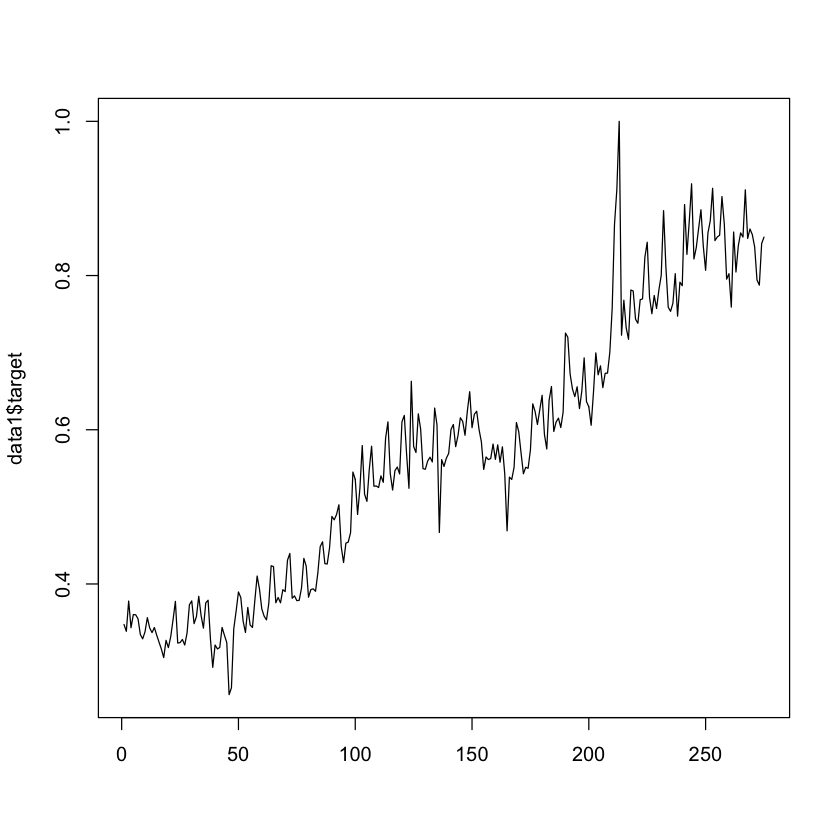

In [86]:
matplot(data1$target, type = "l")

Выделяются, как выбросы, точка 214. 

In [88]:
data1 <- data1[-c(214), ]

Выберем ряды-предикторы: они должны коррелировать с target до времени события -- августа 2015, и также должны коррелировать, но возможно чуть меньше, после ноября 2015. Но при этом не должны также сильно коррелировать в период проведения рекламной компании.

In [93]:
cor(data1[1:162, c(2, 43:53)])

,target,may_be_not_impacted_2,may_be_not_impacted_3,may_be_not_impacted_4,may_be_not_impacted_5,may_be_not_impacted_6,may_be_not_impacted_7,may_be_not_impacted_8,may_be_not_impacted_9,may_be_not_impacted_10,may_be_not_impacted_11,may_be_not_impacted_12
target,1.0000000,0.3612376,0.2073349,0.5208863,0.5790521,0.3616928,0.8452910,0.3297586,0.7349984,0.2642765,0.5401592,0.4368307
may_be_not_impacted_2,0.3612376,1.0000000,0.3898971,0.6143543,0.7861891,0.7253543,0.6863636,0.3383522,0.7887273,0.8061835,0.2921934,0.9283878
may_be_not_impacted_3,0.2073349,0.3898971,1.0000000,0.4471008,0.1276811,0.6099609,0.4152230,0.9214267,0.4950578,0.7482098,0.6137363,0.2836161
may_be_not_impacted_4,0.5208863,0.6143543,0.4471008,1.0000000,0.6899535,0.8747391,0.6944698,0.5784845,0.6544117,0.7417766,0.7504433,0.6839038
may_be_not_impacted_5,0.5790521,0.7861891,0.1276811,0.6899535,1.0000000,0.6255919,0.7019589,0.1476895,0.6591651,0.5330350,0.2673657,0.9159131
may_be_not_impacted_6,0.3616928,0.7253543,0.6099609,0.8747391,0.6255919,1.0000000,0.6439228,0.6606735,0.6801139,0.8782433,0.6771629,0.7289157
may_be_not_impacted_7,0.8452910,0.6863636,0.4152230,0.6944698,0.7019589,0.6439228,1.0000000,0.4946989,0.9682275,0.6077549,0.6348204,0.6853706
may_be_not_impacted_8,0.3297586,0.3383522,0.9214267,0.5784845,0.1476895,0.6606735,0.4946989,1.0000000,0.5328406,0.7220863,0.8212378,0.2678329
may_be_not_impacted_9,0.7349984,0.7887273,0.4950578,0.6544117,0.6591651,0.6801139,0.9682275,0.5328406,1.0000000,0.7175320,0.5947871,0.7250996
may_be_not_impacted_10,0.2642765,0.8061835,0.7482098,0.7417766,0.5330350,0.8782433,0.6077549,0.7220863,0.7175320,1.0000000,0.5860094,0.7244304


Оставим may_be_not_impacted:  5, 7, 9, 11. И запустим Causal Impact.

In [99]:
pre.period <- c(1, 130)
post.period <- c(131, 162)

set.seed(0)
test.data <- cbind(data1$target, data1$may_be_not_impacted_5, data1$may_be_not_impacted_7,
                   data1$may_be_not_impacted_9, data1$may_be_not_impacted_11)
impact <- CausalImpact(test.data, pre.period, post.period)
g <- impact$series

Итак надо оценить 25, 26, 30, 31, 33-35. Получившуюся эффективность поделим пропорционально estimation_size_of_marketing_activity.

Нам интересны события, которые нарушают корреляцию таргета и предиктора. Возьмем большое событие с август15 по ноябрь15 и посмотрим, как ведет себя корреляция Пирсона для рядов до, внутри и после события.  

In [57]:
target <- data1$target

cor.prs <- function(target, predictor) {
    res <- cor.test(target, predictor, method = "pearson", use = "complete.obs")
    return(list(cor = as.numeric(res$estimate), p.value = res$p.value))
}

check <- function (predictor, event) {
    date.before <- data1$date < event$start_date
    date.inside <- data1$date >= event$start_date & data1$date <= event$end_date
    date.after <- data1$date > event$end_date
    
    before <- cor.prs(target[date.before], predictor[date.before])
    inside <- cor.prs(target[date.inside], predictor[date.inside])
    after <- cor.prs(target[date.after], predictor[date.after])
    
    return(list(before = before, inside = inside, after = after))
}

In [40]:
predictors <- c("market_1", "market_2", "market_3", "market_4", "market_5")

In [41]:
befores <- list()
insides <- list()
afters <- list()

for (predictor in predictors){
    test <- check(unlist(data1[predictor]), observe.main_event)
    befores <- c(befores, test$before$cor)
    insides <- c(insides, test$inside$cor)
    afters <- c(afters, test$after$cor)
}

In [13]:
data1[c(1:4),]

date,target,market_1,market_2,market_3,market_4,market_5,should_be_impacted_1,should_be_impacted_2,should_be_impacted_3,⋯,may_be_not_impacted_3,may_be_not_impacted_4,may_be_not_impacted_5,may_be_not_impacted_6,may_be_not_impacted_7,may_be_not_impacted_8,may_be_not_impacted_9,may_be_not_impacted_10,may_be_not_impacted_11,may_be_not_impacted_12
2013-12-18,21110.60,5855898,10490066,6400020,17303909,8277376,202418.0,501304.0,281527.7,⋯,2.46,20.30,11.76,13.53,27.36,23.53,41.25,NA,23.73,9.24
2013-12-19,19985.20,5233946,8856544,5772768,13711773,7417712,195205.4,456269.5,222715.5,⋯,2.05,13.05,12.25,14.76,28.50,28.96,37.95,11.94,31.64,6.93
2013-12-20,19602.36,4923801,8346250,5429014,12574661,6999351,205468.9,496172.0,283458.8,⋯,1.23,23.20,10.78,9.84,45.03,27.15,34.65,7.96,28.25,3.85
2013-12-21,21955.16,6061035,10408902,6624329,17318726,8561364,210051.0,516636.4,272849.0,⋯,3.28,24.65,10.78,11.07,44.46,25.34,36.30,5.97,38.42,8.47


In [14]:
data2[c(1:4),]

num,start_date,end_date,estimation_size_of_marketing_activity,is_related_to_our_service
1,2014-01-12,2014-02-11,4.6,1
2,2014-01-17,2014-02-15,0.1,0
3,2014-02-07,2014-02-21,0.5,1
4,2014-04-07,2014-05-10,5.7,1


In [42]:
rbind(befores, insides, afters)

befores,0.9344335,0.9277701,0.856156,0.9569206,0.9350295
insides,0.3415518,0.2704994,0.3550954,0.8803169,0.4051838
afters,0.5452291,0.1816742,0.0937586,-0.7026342,0.04584271


Можно видеть, что до периода рекламы все придикторы хорошо коррелируют с таргетом, во время - только 4ый, а после - все, кроме 1го. Таким образом, будем рассматривать 2, 3 и 5 столбцы-предикторы.  

Табличка есть в гугл документе* 

Проблема заключается в том, что рекламные компании 25-29 все входят в рекламную кампанию 26. Аналогично в 30 входят 31, 33-35. 33-35 совсем невозможно отличить, но они з акончились  после  ноября  2015,  поэтому  я  их  не  рассматриваю.
В таблице везде значение p-value ниже 0.05, я также выделила значения, большие 0.01 -- к ак т е, к оторым  не  совсем  можно  доверять
Таким образом, если считать, что влияние рекламы идет равномерно (что конечно же не так), тогда можно разделить влияние реклам, период действия которых
накладывались. Таким образом лучший результат достигается у 27 и 31 реклам -- что очень  странно,  потому  что  именно  их  влияние  было  оценено  0.

Поэтому рассмотрим также как повлияли компание с учетом наложения, пусть есть 33-35 компании, тогда возьмем вклад, пропорциональный их size ко всем действующим компаниям на тот момент. Также посмотрим на сколько отличаются результаты в каждой конкретной точке. В этом случае у 27 и 31 влияние получается как раз 0. (Также оценим так тех, у кого знаение меньше p-value маленькие -- 25, и тех кто вошли в 31 -- 33-35)

In [101]:
impct <- (data1$target - g$point.pred) / g$point.pred

In [116]:
imp25_26 = ((sum(impct[163:169]) + sum(impct[170:172])) / 1.6 + sum(impct[173:176]) / 2.3) / 14
print('25, 26') 
print(1.5 * imp25_26 )
print(0.1 * imp25_26 )

[1] "25, 26"
[1] 0.007533582
[1] 0.0005022388


In [115]:
imp31 = (sum(impct[245:254])/4.1 + sum(impct[255:257])/5.8 + sum(impct[258:262])/5.6) / 18
print('33, 34, 35') 
print(1.5*imp31)
print(0.7*imp31)
print(1.7*imp31)

[1] "33, 34, 35"
[1] 0.09269084
[1] 0.04325572
[1] 0.1050496


Итак, мы видим, что 35 имеет самое большое влияние.